In [1]:
import sys
import os
import math
import numpy as np
from numba import njit
from PIL import Image, ImageDraw, ImageFont


In [2]:
5.65e-02


0.0565

In [3]:
w = [5.65e-02,-9.84e-2,352,-0.0428,9.3e-2,121,-8.17e-5,-3.82e-4]
np.mean(w)

59.1259795375

In [4]:
# https://stackoverflow.com/questions/35819142/calculate-a-2d-homogeneous-perspective-transformation-matrix-from-4-points-in-ma#:~:text=The%20perspective%20transformation%20is%20calculated,by%20a%203x3%20matrix%20M%20.&text=To%20take%20account%20of%20these,in%20B%20on%20the%20diagonal.

# https://math.stackexchange.com/questions/494238/how-to-compute-homography-matrix-h-from-corresponding-points-2d-2d-planar-homog

In [5]:
im = Image.open('./target/empty_bilboard1.jpg')

In [6]:
from homography import *

In [7]:
im_annotated = Image.open('./target/empty_bilboard1_annotated.jpg')
im_annotated =  np.array(im_annotated)
target = get_four_points(im_annotated)
# im_annotated
target

array([[ 23.26666667, 192.03333333],
       [ 64.07407407, 322.59259259],
       [150.86111111, 188.47222222],
       [173.39285714, 326.39285714]])

In [353]:
npim = np.array(im)
npim.shape
source_im = Image.open('./source/happy_minions1.png')
source_im = np.array(source_im)
source= get_source_corners(source_im)
source

array([[  0,   0],
       [  0, 820],
       [614,   0],
       [614, 820]])

In [354]:
size1 = np.linalg.norm(source[0]-source[3])
size2 = np.linalg.norm(target[0]-target[3])
size1/size2

5.084617396101152

In [355]:
def homography(x1,y1,x2,y2,x3,y3,x4,y4 , xp1,yp1,xp2,yp2,xp3,yp3,xp4,yp4):
# %This function will find the homography betweeb 4 points using svd
    # x1,y1  = source[0]
    # x2,y2  = source[1]
    # x3,y3  = source[2]
    # x4,y4  = source[3]

    # xp1,yp1 = target[0]
    # xp2,yp2 = target[1]
    # xp3,yp3 = target[2]
    # xp4,yp4 = target[3]


    A=[
    [-x1,  -y1 , -1 ,  0  ,  0  ,  0 ,  x1*xp1  , y1*xp1 ,  xp1],
    [ 0 ,   0  ,  0 ,-x1  , -y1 , -1 ,  x1*yp1  , y1*yp1 ,  yp1],
    [-x2,  -y2 , -1 ,  0  ,  0  ,  0 ,  x2*xp2  , y2*xp2 ,  xp2],
    [ 0 ,   0  ,  0 ,-x2  , -y2 , -1 ,  x2*yp2  , y2*yp2 ,  yp2],
    [-x3,  -y3 , -1 ,  0  ,  0  ,  0 ,  x3*xp3  , y3*xp3 ,  xp3],
    [ 0 ,   0  ,  0 ,-x3  , -y3 , -1 ,  x3*yp3  , y3*yp3 ,  yp3],
    [-x4,  -y4 ,  -1,  0  ,  0  ,  0 ,  x4*xp4  , y4*xp4 ,  xp4],
    [ 0 ,   0  ,  0 , -x4 , -y4 , -1 ,  x4*yp4  , y4*yp4 ,  yp4]]
    # [ 0 ,   0  ,  0 , 0 , 0 , 0 ,  0  , 0 ,  1]]
    # print(np.array(A).shape)
    # b = np.zeros(9)
    # b[8] = 1
    # h = np.linalg.solve(A,b)
    # h = h*np.linalg.norm(h)
    # H = h.reshape((3,3))
    [U,S,V] = np.linalg.svd(A)
    # # V= V.T.conj()

    H=V[:,-1]
    # # H= V[-1]
    H=H.reshape((3,3))
    return H

In [356]:
from cv2 import getPerspectiveTransform
# getPerspectiveTransform(source,target)
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
p0=np.float32([[x0,y0  ], [x1,y1  ], [x2,y2  ],[ x3,y3  ]])
p1=np.float32([[xp0,yp0], [xp1,yp1], [xp2,yp2],[ xp3,yp3]])
M = getPerspectiveTransform(pts1,pts2)
M = getPerspectiveTransform(p0,p1)
M

array([[ 6.00000000e+00, -5.55555556e-01,  1.00000000e+02],
       [ 2.00000000e+00, -4.44444444e-01,  1.00000000e+02],
       [ 2.66666667e-02, -5.55555556e-03,  1.00000000e+00]])

In [357]:
x0=0
y0=0

x1=150
y1=0

x2=150
y2=150

x3=0
y3=150
# %The projected position of points
xp0=100
yp0=100

xp1=200
yp1=80

xp2=220
yp2=80

xp3=100
yp3=200

print('Estimated homography matrix is:')
H=homography(x0,y0, x1,y1, x2,y2, x3,y3, xp0,yp0, xp1,yp1, xp2,yp2,xp3,yp3)
H = H 
print(H)
p0=np.array([[x0,y0  ], [x1,y1  ], [x2,y2  ],[ x3,y3  ]])
# p0[:,0] = p0[:,0]/x2
# p0[:,1] = p0[:,1]/y2
# p0 = p0 /sum(p0)
p1=[[xp0,yp0], [xp1,yp1], [xp2,yp2],[ xp3,yp3]]
p0=np.float32([[x0,y0  ], [x1,y1  ], [x2,y2  ],[ x3,y3  ]])
p1=np.float32([[xp0,yp0], [xp1,yp1], [xp2,yp2],[ xp3,yp3]])
H = getPerspectiveTransform(p0,p1)
# %We project the point (x2 y2) by H and we should get (xp2 yp2)
# projected_point=[x2, y2, 1] * H
for i,j in p0:
    print(i,j)
    projected_point = np.matmul(H,[i,j,1])
    print(projected_point / projected_point[-1])
print(p1)
# projected_point[1][2]/projected_point[1][3]
# projected_point[1][1]/projected_point[1][3]

# homography(source,target)

Estimated homography matrix is:
[[-6.15362625e-03 -2.13285670e-05  1.93874056e-01]
 [-9.06879921e-01 -3.70322696e-01 -4.88904104e-02]
 [ 1.90977384e-02 -1.96021606e-06  7.06374176e-03]]
0.0 0.0
[100. 100.   1.]
150.0 0.0
[200.  80.   1.]
150.0 150.0
[220.  80.   1.]
0.0 150.0
[100. 200.   1.]
[[100. 100.]
 [200.  80.]
 [220.  80.]
 [100. 200.]]


In [358]:
-5.55972948e+01

-55.5972948

In [359]:
# Given four corners of source and the corresponding four points of the target image,
# return the transformation matrix that allows this transformation.
def get_matrix(source, target):

    x0,y0 = source[0]
    x1,y1 = source[1]
    x2,y2 = source[2]
    x3,y3 = source[3]

    u0,v0 = target[0]
    u1,v1 = target[1]
    u2,v2 = target[2]
    u3,v3 = target[3]

    A = np.array([
        [x0 ,y0, 1, 0, 0 , 0,-x0*u0, -y0*u0, -u0],
        [x1 ,y1, 1, 0, 0 , 0,-x1*u1, -y1*u1, -u1],

        [x2 ,y2, 1, 0, 0 , 0,-x2*u2, -y2*u2, -u2],
        [x3 ,y3, 1, 0, 0 , 0,-x3*u3, -y3*u3, -u3],

        [ 0 , 0, 0,x0, y0, 1,-x0*v0, -y0*v0, -v0],
        [ 0 , 0, 0,x1, y1, 1,-x1*v1, -y1*v1, -v1],

        [ 0 , 0, 0,x2, y2, 1,-x2*v2, -y2*v2, -v2],
        [ 0 , 0, 0,x3, y3, 1,-x3*v3, -y3*v3, -v3],

        [ 0 , 0, 0, 0,  0, 0,     0,      0,   1],
        ])

    b = np.zeros(9)
    b[8] = 1
    h = np.linalg.solve(A,b)
    return h

get_matrix(source,target).reshape([3,3])
    


array([[ 1.93481264e-01,  6.37673723e-02,  2.32666667e+01],
       [-2.36990598e-02,  2.29715442e-01,  1.92033333e+02],
       [-9.49699873e-05,  2.18532090e-04,  1.00000000e+00]])

In [360]:
H = get_matrix(source,target).reshape([3,3])

for i,j in source:
    print(i,j)
    projected_point = np.matmul(H,[i,j,1])
    print(projected_point / projected_point[-1])
print(target)

0 0
[ 23.26666667 192.03333333   1.        ]
0 820
[ 64.07407407 322.59259259   1.        ]
614 0
[150.86111111 188.47222222   1.        ]
614 820
[173.39285714 326.39285714   1.        ]
[[ 23.26666667 192.03333333]
 [ 64.07407407 322.59259259]
 [150.86111111 188.47222222]
 [173.39285714 326.39285714]]


In [361]:
source_image.shape

(614, 820, 3)

In [367]:
im = Image.open('./target/empty_bilboard1.jpg')
npim = np.array(im)
new_target = np.zeros_like(npim)
new_target = npim
source_image = Image.open('source/happy_minions1.png')
source_image = np.array(source_image)
x = get_matrix(source, target)
x = x.reshape((3,3))
for i in range(0, source_image.shape[0]-1):
    for j in range(0, source_image.shape[1]-1):
        projected_point = np.matmul(x,[i,j,1])
        projected_point = projected_point/ projected_point[-1]
        newx,newy, free = projected_point

        new_target[int(newx),int(newy)] = source_image[i][j]
        if newx > 173:
            print(newx, newy, free, i,j)
        # if i == j:
        #     print(np.matmul(x,[i,i,1]) )
source_image.shape[0]
print(newx,newy)

172.9719827292314 326.0971565661534


In [387]:
from numba import njit

for i,j in source:
    print(i,j)
    # projected_point = operator.imatmul(H,[i,j,1])
    projected_point = (H @[i,j,1])
    projected_point = (H.dot([i,j,1]))
    print(projected_point / projected_point[-1])
print(target)

0 0
[ 23.26666667 192.03333333   1.        ]
0 820
[ 64.07407407 322.59259259   1.        ]
614 0
[150.86111111 188.47222222   1.        ]
614 820
[173.39285714 326.39285714   1.        ]
[[ 23.26666667 192.03333333]
 [ 64.07407407 322.59259259]
 [150.86111111 188.47222222]
 [173.39285714 326.39285714]]


In [382]:
# from numba import operator
import operator
# operator.imatmul(1,2)

TypeError: unsupported operand type(s) for @=: 'int' and 'int'

In [371]:
np.round_(target)

array([[ 23., 192.],
       [ 64., 323.],
       [151., 188.],
       [173., 326.]])

In [363]:
source_image.shape

(614, 820, 3)

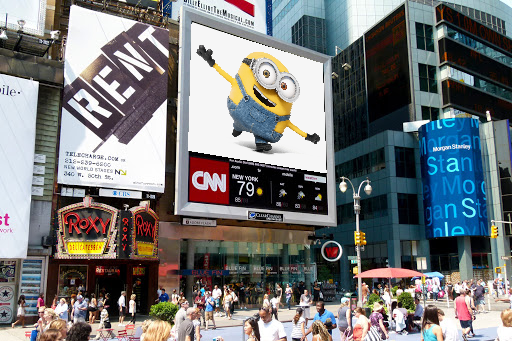

In [368]:
Image.fromarray(new_target)

In [365]:
# np.sqrt(np.abs(get_matrix(source, target)))
get_matrix(source,target).reshape([3,3])



array([[ 1.93481264e-01,  6.37673723e-02,  2.32666667e+01],
       [-2.36990598e-02,  2.29715442e-01,  1.92033333e+02],
       [-9.49699873e-05,  2.18532090e-04,  1.00000000e+00]])

In [309]:
im = Image.open('./target/empty_bilboard1.jpg')
npim = np.array(im)
new_target = np.zeros_like(npim)
new_target = npim
source_image = Image.open('source/happy_minions1.png')
source_image = np.array(source_image)
# new_target
# print(target.shape)
x = get_matrix(source, target)
# x = get_matrix(source, targ2)
# x = np.abs(get_matrix(source, target))
# x = x/np.linalg.norm(x)
# print(x)
x = x.reshape((3,3))
# x = x * -0.38136245781790584
# print(x)
for i in range(0, new_target.shape[0]-1):
    for j in range(0,new_target.shape[1]-1):
# for i in range(0, int(source[3][0])-1):
#     for j in range(0,int(source[3][1])-1):
        bi = np.array([i,j,1])
        # bi = np.array([i,j,1])
        newx, newy,   w= np.matmul(x,bi)
        newx = newx / w
        newy = newy / w
        # print(free)
        try:
            new_target[int(newx)][int(newy)]=source_image[i][j]
            # new_target[int(newx)][int(newy)]=source_image[int(i/free )][int(j/free)]
        except:
            # print('this')
            pass
print(newx,newy, source_image.shape)

172.64415319605018 325.91663467912065 (614, 820, 3)


In [310]:
get_matrix(source,targ2), get_matrix(source,target)

(array([ 5.97055715e-04,  1.75026724e-04,  3.98745799e-02, -7.31319343e-05,
         6.30515888e-04,  3.29108101e-01, -1.71001678e-04,  3.49992800e-04,
         1.00000000e+00]),
 array([ 3.48379753e-01,  1.02127432e-01,  2.32666667e+01, -4.26722073e-02,
         3.67903638e-01,  1.92033333e+02, -1.71001678e-04,  3.49992800e-04,
         1.00000000e+00]))

In [311]:
320.015315190959/173.39285714,np.linalg.eig(x)[0]

(1.8456084089587024, array([1.08105438, 0.36251611, 0.2727129 ]))

In [312]:
smallest_eigenvector_index = np.where(np.linalg.eig(x)[0] ==(np.min(np.linalg.eig(x)[0])))[0][0]
smallest_eigenvector = np.linalg.eig(x)[1][:,smallest_eigenvector_index]
# np.linalg.eig(x)[1][:,0], np.linalg.eig(x)
smallest_eigenvector_index, smallest_eigenvector
np.min(np.linalg.eig(x)[0])
np.linalg.eig(x)[1]

array([[-2.50860943e-01, -9.96119017e-01,  7.46144796e-01],
       [-9.68016250e-01, -8.80162302e-02, -6.65783522e-01],
       [-3.65064898e-03, -2.18880790e-04,  4.95830947e-04]])

array([[ 23.26666667, 192.03333333],
       [ 64.07407407, 322.59259259],
       [150.86111111, 188.47222222],
       [173.39285714, 326.39285714]])

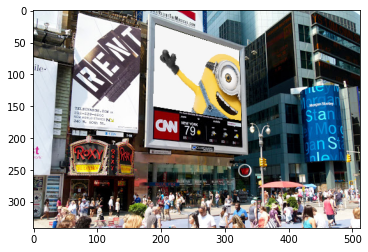

In [313]:
# display(new_target)
import matplotlib.pyplot as plt
plt.imshow(new_target)
npim.shape
target

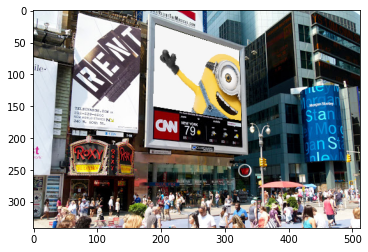

In [314]:
plt.imshow(npim)

In [138]:
x = get_matrix(source, target)
x = x.reshape((3,3))
source3d = np.zeros((3,3))
source3d = source + source3d
source3d
# np.matmul(x,source)

ValueError: operands could not be broadcast together with shapes (4,2) (3,3) 

In [76]:
import cv2
cv2.getPerspectiveTransform(source, target)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\imgwarp.cpp:3392: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'
